# Ch `09`: Concept `01`

## Using the CIFAR-10 dataset

Download the CIFAR-10 dataset for Python here https://www.cs.toronto.edu/~kriz/cifar.html.

The documentation comes with the following helper function:

In [0]:
import pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

Each image is a flat vector of colored pixel values. We'll convert it to a matrix of pixels instead to make it easer to reason about the image. 

First, let's grayscale the image so that we can deal with a more natural representation.

Then, we'll crop the edges of the image away to further similify the number of dimensions in the input data.

Finally, we'll normalize the input by subtracting the mean pixel intensity and dividing by the standard deviation.

In [0]:
import numpy as np

def clean(data):
    imgs = data.reshape(data.shape[0], 3, 32, 32)
    grayscale_imgs = imgs.mean(1)
    cropped_imgs = grayscale_imgs[:, 4:28, 4:28]
    img_data = cropped_imgs.reshape(data.shape[0], -1)
    print(img_data.shape)
    img_size = np.shape(img_data)[1]
    means = np.mean(img_data, axis=1)#average pixel value for each image
    print(means.shape)
    print(means[0])
    print(np.sum(img_data,axis=1).shape)
    print(np.sum(img_data,axis=1)[0] / (float) (img_data.shape[1]))#average pixel value for each image
    meansT = means.reshape(len(means), 1)
    stds = np.std(img_data, axis=1)
    print(stds.shape)
    print(stds[0])
    stdsT = stds.reshape(len(stds), 1)
    adj_stds = np.maximum(stdsT, 1.0 / np.sqrt(img_size))
    normalized = (img_data - meansT) / adj_stds
    return normalized

Here's a helper function to load and clean all the images:

In [0]:
def read_data(directory):
    names = unpickle('{}/batches.meta'.format(directory))['label_names']
    print('names', names)

    data, labels = [], []
    for i in range(1, 6):
        filename = '{}/data_batch_{}'.format(directory, i)
        batch_data = unpickle(filename)
        if len(data) > 0:
            data = np.vstack((data, batch_data['data']))
            labels = np.hstack((labels, batch_data['labels']))
        else:
            data = batch_data['data']
            labels = batch_data['labels']

    print(np.shape(data), np.shape(labels))

    data = clean(data)
    print(data.shape)
    print(len(data))
    print("####")
    data = data.astype(np.float32)
    return names, data, labels

Let's display some images from the dataset:

Mounted at /content/drive
names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)
(50000, 576)
(50000,)
111.00810185185185
(50000,)
111.00810185185185
(50000,)
46.13916411492728
(50000, 576)
50000
####


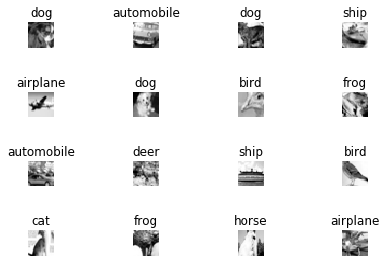

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
colabGDriveEnv = True

if colabGDriveEnv == True:
  from google.colab import drive
  drive.mount('/content/drive',force_remount=True)

random.seed(1)

names, data, labels = read_data('/content/drive/My Drive/cifar-10-batches-py')

def show_some_examples(names, data, labels):
    plt.figure()
    rows, cols = 4, 4
    random_idxs = random.sample(range(len(data)), rows * cols)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        j = random_idxs[i]
        plt.title(names[labels[j]])
        img = np.reshape(data[j, :], (24, 24))
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('cifar_examples.png')

show_some_examples(names, data, labels)